# Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Process mining course/10_K_Means_XGBoost_Assignment')

Mounted at /content/drive


# Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
import seaborn as sns

# Import the dataset

In [ ]:
df = pd.read_csv(r'Data Boosting.csv')
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


# Preprocessing

In [ ]:
# Check for missing values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# convert class column to binary
df['Class'] = df['Class'].map({2: 0, 4: 1})

# separate dependent variable
X = df.iloc[:,:-1].values
y= df.iloc[:,-1].values

df


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


# Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#  XGBoost is less sensitive to feature scaling compared to other ml algorithms

# Training the XGBoost on the Training set

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Evaluate the Model

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy: 97.81%
Confusion matrix:
[[85  2]
 [ 1 49]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        50

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



0.9781021897810219

# Make the Confusion Matrix

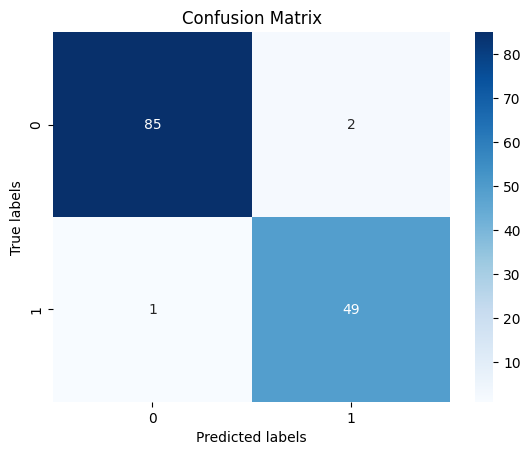

In [ ]:
cm =  confusion_matrix(y_test, y_pred)

# display cm as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Applying k-Fold Cross Validation

In [ ]:
# split into 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# perform k-fold cross-validation and return evaluation metric
scores = cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy')

# print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean accuracy:', scores.mean())

Cross-validation scores: [0.97101449 0.97101449 0.95652174 0.97058824 0.95588235 0.95588235
 0.94117647 0.98529412 0.95588235 0.97058824]
Mean accuracy: 0.963384484228474


# Perform parameter tuning using grid search

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create new instance of model 

In [ ]:
xgb = XGBClassifier(**best_params)

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 97.81%
